# Very Short NetworkX tutorial

The purpose of this short tutorial is to help you get started with NetworkX, a Python library for networks.

For full documentation, visit: https://networkx.github.io/ .

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt # plotting module

In [2]:
# Let's create a random network that follows the Watts-Strogatz model.

gg = nx.random_graphs.connected_watts_strogatz_graph(n = 400, k = 4, p = 0.25)

To see the documentation for the above function, comment out the line below and execute the cell:

In [1]:
# nx.random_graphs.connected_watts_strogatz_graph?

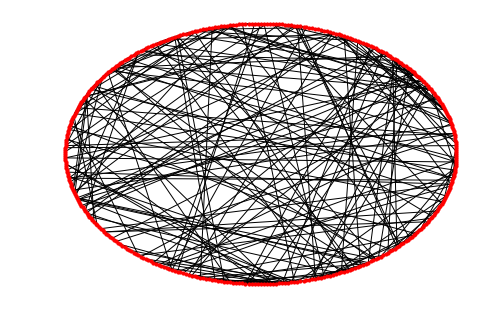

In [4]:
# Circular plot of the network

nx.draw_circular(gg, node_size = 10)

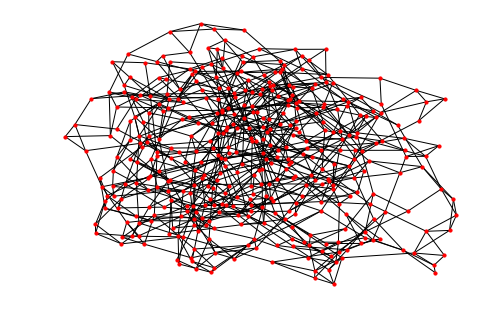

In [5]:
# Another plot of the same network

nx.draw(gg, node_size = 10)

In [6]:
def get_shortest_path_lengths(gg):
    '''
    Return the shortest-path-lengths of all pairs of nodes in a single list.
    Lengths are normalized by node-size of the graph.
    '''
    size = len(gg) # number of nodes in graph
    shortest_path_lengths = []
    for source, source_lengths in nx.shortest_path_length(gg):
        for target in source_lengths:
            length = source_lengths[target]
            shortest_path_lengths.append(length / size)
    return shortest_path_lengths

In [7]:
# Let's create a 2D-grid network.

grid = nx.generators.grid_2d_graph(m = 20, n = 20, periodic=True)

In [8]:
# Let's create a network that follows Kleinberg's model.
kleinberg = nx.generators.navigable_small_world_graph(n = 20, p=1, q=1, r=2, dim=2, seed=None).to_undirected()

In [9]:
# Retrieve the shortest path lengths for each graph
gg_spl = get_shortest_path_lengths(gg)
grid_spl = get_shortest_path_lengths(grid)
klein_spl = get_shortest_path_lengths(kleinberg)

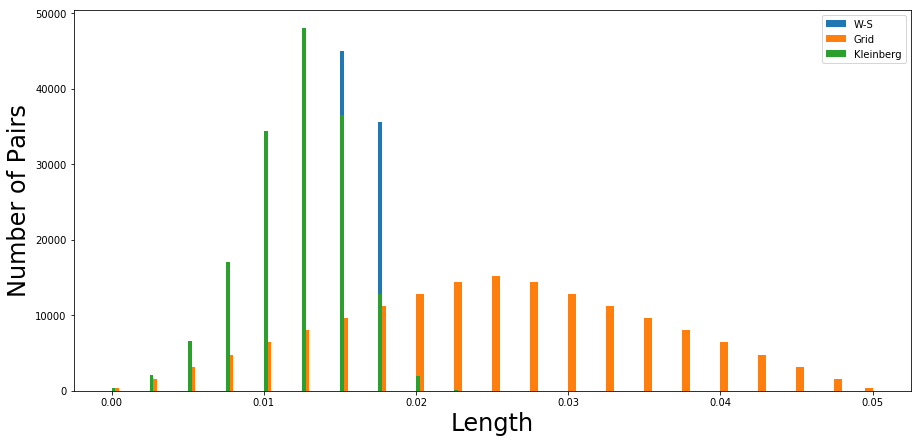

In [10]:
# Plot the histogram of shortest-path-lengths for each graph

fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.set_xlabel('Length', fontdict={'size': 24})
ax.set_ylabel('Number of Pairs', fontdict={'size': 24})
ax.hist(gg_spl, bins = 100, label='W-S');
ax.hist(grid_spl, bins = 100, label = 'Grid');
ax.hist(klein_spl, bins = 100, label = 'Kleinberg');
ax.legend();